<a href="https://colab.research.google.com/github/SYongho/Estimated-LH-PG-in-horizontal-pipe/blob/10-Inputs/LH_PG_MultiOutputRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from time import strftime
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor

# Data split

In [4]:
prepared_data = pd.read_csv('prepared_data.csv')

csv_inp = prepared_data.iloc[:, :10]
csv_out = prepared_data.iloc[:, 10:]

train_inp, val_inp, train_out, val_out = train_test_split(csv_inp, csv_out, test_size=0.2, random_state=38)
train_inp, test_inp, train_out, test_out = train_test_split(train_inp, train_out, test_size=0.2, random_state=38)

# Prediction

In [5]:
test_out = test_out.reset_index(drop=True)

RF = RandomForestRegressor()
MR = MultiOutputRegressor(estimator=RF)
MR.fit(train_inp, train_out)
score = MR.score(train_inp, train_out)
print('Training score: ', score)

test_pred = pd.DataFrame(MR.predict(test_inp), columns=train_out.columns)

test_out_LH = test_out.iloc[:, 0]
test_out_PG = test_out.iloc[:, 1]
test_pred_LH = test_pred.iloc[:, 0]
test_pred_PG = test_pred.iloc[:, 1]

Training score:  0.9938391069206908


In [7]:
def RMSE(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

def MAPE(targets, predictions):
  return np.mean(np.abs((targets-predictions) / targets)) * 100

def MSE(targets, predictions):
  return np.mean(np.square(targets-predictions))

## Error

In [12]:
def Error_Df():
  df = [
        RMSE(test_out_LH, test_pred_LH), RMSE(test_out_PG, test_pred_PG),
        MAPE(test_out_LH, test_pred_LH), MAPE(test_out_PG, test_pred_PG),
        MSE(test_out_LH, test_pred_LH), MSE(test_out_PG, test_pred_PG),
        metrics.r2_score(test_out_LH, test_pred_LH), metrics.r2_score(test_out_PG, test_pred_PG)]
  error_col = ['pred_LH RMSE', 'pred_PG RMSE', 'pred_LH MAPE', 'pred_PG MAPE', 'pred_LH MSE', 'pred_PG MSE', 'LH_R2 score', 'PG_R2 score']

  return pd.DataFrame([df], columns=error_col)

In [13]:
Error_Df()

,pred_LH RMSE,pred_PG RMSE,pred_LH MAPE,pred_PG MAPE,pred_LH MSE,pred_PG MSE,LH_R2 score,PG_R2 score
0,0.038197,756.484613,inf,55.926649,0.001459,572268.968992,0.978133,0.892476


## Plot

In [14]:
def plot_compare_LH(true, prediction):
  plt.scatter(true, prediction, c='k', s=1.8)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('square')
  plt.xlim([0,1])
  plt.ylim([0,1])
  _ = plt.plot([-100,100], [-100,100])

def plot_compare_PG(true, prediction):
  plt.scatter(true, prediction, c='k', s=1.8)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('square')
  plt.xlim([0,max(true)-(max(true)%10)+1000])
  plt.ylim([0,max(true)-(max(true)%10)+1000])
  _ = plt.plot([-20000,20000], [-20000,20000])

,test_out_LH,test_pred_LH
0,0.05,0.0570
1,0.06,0.0656
2,0.13,0.1236
3,0.28,0.2639
4,0.59,0.5964
...,...,...
119,0.06,0.0427
120,0.61,0.6429
121,0.02,0.0267
122,0.01,0.0169


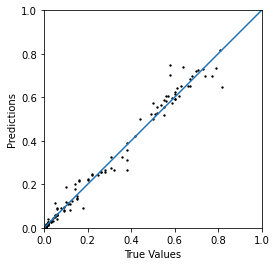

In [15]:
plot_compare_LH(test_out_LH, test_pred_LH)
pd.DataFrame({'test_out_LH':test_out_LH,
              'test_pred_LH':test_pred_LH})

,test_out_PG,test_pred_PG
0,75.00,79.4900
1,9.95,13.8575
2,79.00,78.3932
3,836.00,595.0292
4,170.00,200.4698
...,...,...
119,99.00,67.1000
120,3089.00,2889.1700
121,198.00,208.2000
122,76.00,71.2990


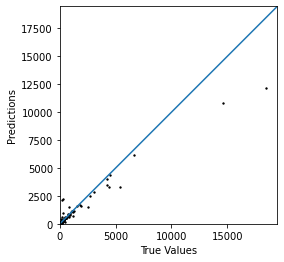

In [16]:
plot_compare_PG(test_out_PG, test_pred_PG)
pd.DataFrame({'test_out_PG':test_out_PG,
              'test_pred_PG':test_pred_PG})